In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', None)

In [3]:
raw_df_train = pd.read_csv('train.csv')
raw_df_test = pd.read_csv('test.csv')

In [4]:
raw_df_train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


- MSSubClass - тип жилья
- MSZoning - зонирование продажи
- LotFrontage - линейные метры улицы соединенной с участком
- LotArea - площадь участка
- Street - тип подъездной дороги
- Alley - тип доступа к собственной аллеи
- LotShape - тип участка (регулярный, немного нерегулярный)
- LandContour - ровность участка
- Utilities - доступные удобства(коммунальные услуги типа газ, электричество, вода и т. д.)
- LotConfig - конфигурация, локация относительно других объектов
- LandSlope - наклок или уклон
- Neighborhood -  окрестности
- Condition 1 & Condition 2 - возможно заполнены оба, а может и нет, некоторые дополнительные условия
- BldgType - тип жилья
- HouseStyle - стиль жилья
- OverallQual - общий материал и отделка
- OverallCond - общее состояние дома
- YearBuilt - год постройки
- YearRemodAdd - год обновления(ремонта)
- RoofStyle - стиль крыши
- RoofMatl - материал крыши
- Exterior1st - наружное покрытие дома
- Exterior2nd - наружное покрытие дома, если более одного материала
- MasVnrType - тип облицовки каменной кладки
- MasVnrArea - площадь облицовки каменной кладки
- ExterQual - качество материала внешняя сторона
- ExterCond - текущее состояние материала на внешней стороне
- Foundation - тип фундамента
- BsmtQual - высота подвала
- BsmtCond - общее состояние подвала
- BsmtExposure - экспозиция подвала
- BsmtFinType1 - оценка площади отделки подвала
- BsmtFinSF1 - тип1 готовые квадратные футы
- BsmtFinType2 - тоже самое что тип 1, если есть несколько подвальных площадей
- BsmtFinSF2 - тип2 готовые квадратные футы
- BsmtUnfSF - недостроенные квадратные футы подвала
- TotalBsmtSF - общая площадь подвала
- Heating - отопление
- HeatingQC - качество и состоние отопления
- CentralAir - центральное кондиционирование воздуха
- Electrical - электрическая система
- 1stFlrSF - площадь 1ого этажа
- 2stFlrSF - площадь 2ого этажа
- LowQualFinSF - квадратные футы с низким качество отделки
- GrLivArea - надземная жилая площадь
- BsmtFullBath - количество полных ванных комнат в подвале
- BsmtHalfBath - количество 1/2 ванных в подвале
- FullBath - количество над
- HalfBath - тоже количество но уже над
- Bedroom - количество спален, без спален на цокольном этаже
- Kitchen - кухни над уровнем земли
- KitchenQual - качество кухни
- TotRmsAbvGrd - количество комнат над уровнем земли
- Functional - функциональность
- Fireplaces - количество каминова
- FireplaceQu - качество камина
- GarageType - расположение гаража
- GarageYrBlt - год постройки гаража
- GarageFinish - внутреняя отделка гаража
- GarageCars - вместимость гаража в кол. автомобилей
- GarageArea - площадь гаража
- GarageQual - качество гаража
- GarageCond - состояние гаража
- PavedDrive - асфальтированна подъезная дорога
- WoodDeckSF - площадь деревянной палубы
- OpenPorchSF - площадь открытой веранды
- EnclosedPorch - площадь закрытого крыльца
- 3SsnPorch - площадь трехсезонного крыльца
- ScreenPorch - площадь крыльца
- PoolArea - площадь бассейна
- PoolQC - качество бассейна 
- Fence - забор
- MiscFeature - несоответсвия
- MiscVal - стоимость разных функций(несоотвествий)
- MoSold - месяц продажи
- YrSold - год продажи
- SaleType - тип продажи
- SaleCondition - условия продажи

In [5]:
def prepare_df(raw_df, train=True):
    df = raw_df.copy()
    
    df.columns = df.columns.str.lower()
    df['timesold'] = 12 * (df.yrsold - 2006) + df.mosold
    df.lotfrontage = df.lotfrontage.fillna(df.lotfrontage.mean())
    df.garageyrblt = df.garageyrblt.fillna(df.yearbuilt)
    df.masvnrarea = df.masvnrarea.fillna(df.masvnrarea.mean())
    if train:
        df['saleprice'] = np.log1p(df['saleprice'].values)
    for c in df.columns[df.dtypes == 'object']:
        df[c] = df[c].astype(str)
    return df

In [6]:
df = prepare_df(raw_df_train)

In [7]:
numerical = df.columns[df.dtypes != 'object']
categorical = df.columns[df.dtypes == 'object']
numerical.drop('id')

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice', 'timesold'],
      dtype='object')

In [8]:
#df = df[numerical]

In [9]:
df[df.columns[df.dtypes != 'object']].isnull().sum()

id               0
mssubclass       0
lotfrontage      0
lotarea          0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
masvnrarea       0
bsmtfinsf1       0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
totrmsabvgrd     0
fireplaces       0
garageyrblt      0
garagecars       0
garagearea       0
wooddecksf       0
openporchsf      0
enclosedporch    0
3ssnporch        0
screenporch      0
poolarea         0
miscval          0
mosold           0
yrsold           0
saleprice        0
timesold         0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [11]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [12]:
y_full_train = df_full_train.saleprice
y_train = df_train.saleprice
y_val = df_val.saleprice
y_test = df_test.saleprice

In [13]:
del df_full_train['saleprice']
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [14]:
from sklearn.feature_extraction import DictVectorizer

In [15]:
dv = DictVectorizer(sparse=False)

In [16]:
dict_train = df_train.to_dict(orient='records')

In [17]:
X_train = dv.fit_transform(dict_train)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error as rmse

In [22]:
X_val = dv.transform(df_val.to_dict(orient='records'))

In [23]:
y_pred = model.predict(X_val)

In [24]:
rmse(y_val, y_pred, squared=False)

8.140615126111122

In [25]:
for feature, coef in zip(dv.feature_names_, model.coef_):
    print(feature, coef)

1stflrsf 1583.3080351554584
2ndflrsf 1583.3080557947628
3ssnporch 7.432467123180686e-05
alley=Grvl -3760166.9306125985
alley=Pave -3760166.8794969637
alley=nan -3760166.957051415
bedroomabvgr 0.004000270582537269
bldgtype=1Fam 446961.43856430706
bldgtype=2fmCon 446961.54114160547
bldgtype=Duplex 446961.4677362002
bldgtype=Twnhs 446961.38892177015
bldgtype=TwnhsE 446961.440190107
bsmtcond=Fa 282187.68643653765
bsmtcond=Gd 282187.73797992157
bsmtcond=Po 348481.72065572016
bsmtcond=TA 282187.7330669173
bsmtcond=nan 1703171.3366288343
bsmtexposure=Av 158251.61161795782
bsmtexposure=Gd 158251.66718245434
bsmtexposure=Mn 158251.603481458
bsmtexposure=No 158251.6048303323
bsmtexposure=nan 158251.57253254994
bsmtfinsf1 825274.4449313582
bsmtfinsf2 825274.4448685518
bsmtfintype1=ALQ 144209.251828132
bsmtfintype1=BLQ 144209.25442490165
bsmtfintype1=GLQ 144209.26901051632
bsmtfintype1=LwQ 144209.2388283998
bsmtfintype1=Rec 144209.26295824227
bsmtfintype1=Unf 144209.24609012716
bsmtfintype1=nan -6

In [26]:
rmse(np.expm1(y_val), np.expm1(y_pred), squared=False)

4.558022593754573e+46

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 3, min_samples_split=3, random_state=1)

In [28]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3, random_state=1)

In [29]:
y_pred = dtr.predict(X_val)

In [30]:
rmse(y_val, y_pred)

0.046899926572528054

In [31]:
(sum([(x1 - x2)**2 for x1, x2 in zip(np.expm1(y_val), np.expm1(y_pred))])/len(y_val) )**(1/2)

41857.96984800306

In [32]:
rmse( np.expm1(y_pred),np.expm1(y_val), squared=False)

41857.96984800306

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfc = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, bootstrap=0.2)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=0.2, max_depth=10, min_samples_leaf=5)

In [35]:
y_pred = rfc.predict(X_val)

In [36]:
rmse(y_val, y_pred, squared=False)

0.1361821312565734

In [37]:
rmse(np.expm1(y_pred),np.expm1(y_val), squared=False)

27026.452812118026

In [38]:
max_depth = 10

In [39]:
scores = []
for s in [1, 3 , 5, 10, 50]:
    for n in range(10,201,10):
        rfg = RandomForestRegressor(n_jobs=-1,
                                    n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rfg.fit(X_train, y_train)
        y_pred = rfg.predict(X_val)
        rmse_score = rmse(y_val,y_pred,squared=False)
        scores.append((s, n, rmse_score))

In [40]:
df_scores = pd.DataFrame(scores, columns = ['min_sample_leaf','n_estimators', 'rmse_score'])

In [41]:
df_scores

,min_sample_leaf,n_estimators,rmse_score
0,1,10,0.144623
1,1,20,0.139127
2,1,30,0.138553
3,1,40,0.136561
4,1,50,0.135171
5,1,60,0.135541
6,1,70,0.134839
7,1,80,0.134798
8,1,90,0.134579
9,1,100,0.134787


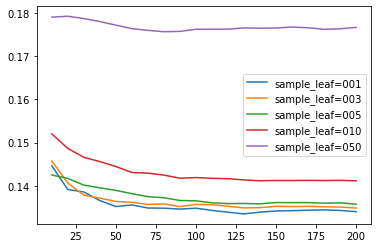

In [42]:
for s in [1, 3 , 5, 10, 50]:
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.rmse_score,label = 'sample_leaf=%.3d' % s)
# plt.ylim((0,1))
# plt.xlim((0,200))
plt.legend()

In [43]:
import xgboost as xgb

In [44]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [45]:
xgb_params = {
    'eta' : 0.03,
    'max_depth': 10,
    'min_child_weight': 20,
    
    'objective': 'reg:squarederror',
    'nthread':-1,
    #'eval_metric': 'rmse',
    'seed':1,
    'verbosity': 1 # show only warnings
    
}

In [46]:
model = xgb.train(xgb_params, dtrain, num_boost_round=2000)

In [47]:
y_pred = model.predict(dval)

In [48]:
rmse(y_val, y_pred, squared=False)

0.11657065192021404

In [49]:
rmse(np.expm1(y_val), np.expm1(y_pred), squared=False)

21773.211591910473

In [50]:
from tqdm.auto import tqdm

In [51]:
#tunning:
scores = []
for eta in tqdm([0.01, 0.03, 0.07, 0.1, 0.15]):
    for max_depth in [4, 6, 7, 8, 9, 10, 11]:
        for min_child_weight in [1, 2, 5, 10, 20, 30, 50]:
            xgb_params = {
                'eta' : eta,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,

                'objective': 'reg:squarederror',
                'nthread':-1,
                #'eval_metric': 'rmse',
                'seed':1,
                'verbosity': 1 # show only warnings

            }
            model = xgb.train(xgb_params, dtrain, num_boost_round=500)
            y_pred = model.predict(dval)
            rmse_score = rmse(y_val, y_pred, squared=False)
            scores.append((eta, max_depth,min_child_weight,rmse_score))

  0%|          | 0/5 [00:00<?, ?it/s]

In [52]:
df_scores = pd.DataFrame(scores, columns = ['eta','max_depth','min_child_weight', 'rmse_score'])

In [54]:
df_scores[abs(df_scores.rmse_score - df_scores.rmse_score.min())<=0.00001]

,eta,max_depth,min_child_weight,rmse_score
115,0.07,7,10,0.110223
